<a href="https://colab.research.google.com/github/Rogerio-mack/Temporal/blob/main/cap5_SarimaX_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos ARIMA Sazonais e com Variáveis Exógenas** 
___


Neste capítulo você vai aprender sobre:

* Ajustar modelos ARIMA para dados com efeitos de sazonalidade
* Levar em conta o efeito de variáveis exógenas
* Introduzir variáveis exógenas para o melhor ajuste de modelos ARIMA 

## Modelos SARIMA

Nos capítulos anteriores você aprendeu como modelar séries temporais através dos modelos ARIMA. A classe de modelos ARIMA assume entre outras premissas básicas que a série temporal estudada é estacionária, livre de tendência e sazonalidade. A estacionariedade de uma série pode ser verificada a partir do teste de Dickey Fuller, equanto que o efeito de sazonalidade pode ser visto através da visualização da decomposição entre tendência, sazonalidade e resíduo. Enquanto o efeito de estacionariedade pode ser removido através da diferenciação o efeito da sazonalidade precisa ser contabilizado caso a série assim se comporte. 
Uma parte bastante significativa das séries temporais no dia a dia apresentam efeitos de sazonalidade:
* Temperaturas diárias: se medirmos as temperaturas de hora em hora ao longo de um dia é bem provável que depois de alguns dias se observe um comportamento sazonal. 
* Vendas mensais: lojas do varejo frequentemente observam variações periódicas nas suas vendas principalmente em função de feriados ou promoções periódicas.
* Colheitas em agricultura: a produção agrícola segue um padrão sazonal dado que colheitas de produtos específicos acontecem em uma data específica do ano. 

Neste sentido podemos definir sazonalidade como sendo a tendência de um processo em se repetir dentro de um determinado período.
A partir deste contexto é fácil perceber que a hipótese de ausência de sazonalidade em uma série temporal pode representar uma limitação significativa para a modelagem com modelos ARIMA. Essa motivação levou à criação de uma nova classe de modelos denominados em inglês por *Seasonal Autoregressive Integrated Moving Average* (SARIMA). A motivação para esses modelos corresponde exatamente à tentativa de capturar os padrões nos dados que se repetem em intervalos periódicos, tais como dias, meses e anos. 

O modelo SARIMA inclui tanto componentes sazonais como componentes não sazonais. Desta forma, temos uma ferramenta poderosa de forecast que é afetada por elementos sazonais. 

De uma forma geral, um modelo SARIMA pode ser representado da seguinte forma:

$$SARIMA(p,d,q)(P,D,Q)_m$$

onde:

* p é a ordem da componente autoregressiva (AR) entre a série e os seus lags, e P tem o mesmo significado para a componente sazonal.
* d é o grau de diferenciação necessário para obter estacionariedade na série, D tem o mesmo significado para a componente sazonal. 
* q é a ordem da média móvel (MA), que modela a relação entre a série e os resíduos, e Q tem o mesmo significado para a componente sazonal. 
* m representa o período observado.

Vale notar que m, é um parâmetro que depende do intervalo de tempo dos dados. Se temos dados medidos ao longo de 30 dias (1 mês) e observamos uma sazonalidade com período de 7 dias, o valor de m será m=7, enquanto que se tivermos dados  mensais ao longo de 1 ano (12 meses) com sazonalidade mensal, o valor de m=1.

Neste ponto, vale a pena entendermos a equação que é ajustada em um modelo SARIMA. Utilizando a mesma notação do capítulo anterior temos que: 

$$
W_t^{'}=\underbrace{\Delta^d Y_t}_{\text {série após d diferenças }}
$$
o que define o parâmetro d. No caso da série se tornar estacionária após uma diferenciação (d=1), teríamos que $W_t^{'}=Y_t-Y_{t-1}$. No entanto, em uma série com sazonalidade eventualmente também precisamos diferenciar a série na componente sazonal e assim definir o parâmetro D, de tal forma que $W_t=Y_t-Y_{t-1m}$, onde $m$ é o período observado. Deste modo a equação para $W_t$ seria:

$$
W_t=c +(
\underbrace{\phi_1 W_{t-1}+\phi_2 W_{t-2}+\ldots+\phi_p W_{t-p}}_{\mathrm{p} \text { - termos autorregressivos }}+
\underbrace{\theta_1 e_{t-1}+\theta_2 e_{t-2}+\ldots+\theta_q e_{t-q}}_{\mathrm{q} \text { - termos de Médias moveis }})+
(\underbrace{\Phi_1 W_{t-1m}+\Phi_2 W_{t-2m}+\ldots+\Phi_p W_{t-Pm}}_{\mathrm{P} \text { - termos sazonais autorregressivos }}+
\underbrace{\Theta_1 e_{t-1m}+\Theta_2 e_{t-2m}+\ldots+\Theta_q e_{t-Qm}}_{\mathrm{Q} \text { - termos sazonais de Médias moveis }})+
e_t,
$$
em que $\phi_1, \ldots, \phi_p, \theta_1, \ldots, \theta_q,\Phi_1, \ldots, \Phi_p, \Theta_1, \ldots, \Theta_q$ são valores a serem estimados e $e_t$ é o ruído branco. A título de exemplo, um modelo SARIMA(2,0,3)$\times$(2,0,1,7), ajustaria a seguinte função:

$W_t=
c+
(\underbrace{\phi_1 W_{t-1}+\phi_2 W_{t-2}}_{\mathrm{p} \text { - termos autorregressivos }}+
\underbrace{\theta_1 e_{t-1}+\theta_2 e_{t-2}+\theta_3 e_{t-3}}_{\mathrm{q} \text { - termos de Médias moveis }})+
(\underbrace{\Phi_1 W_{t-(1\times7)}+\Phi_2 W_{t-(2\times7)}}_{\mathrm{P} \text { - termos sazonais autorregressivos }}+
\underbrace{\Theta_1 e_{t-(1\times7)}}_{\mathrm{Q} \text { - termos sazonais de Médias moveis }})+
e_t,
$

É fácil perceber matematicamente a relação entre os modelos ARIMA e os modelos SARIMA. Essa relação permanece ainda explícita quando ajustamos um modelo SARIMA em Python com o uso da biblioteca statsmodel.




### SARIMA com Python (hands-on) 

Vamos iniciar essa sessão intalando a biblioteca pmdarima. Essa biblioteca nos permite varrer um espaço de parâmetros para determinar a partir do Akaike Information Criteria (AIC) o melhor conjunto de parâmetros (p,d,q)(P,D,Q,m). Além disso, procedemos com os imports das componentes da biblioteca statsmodel já utilizadas anteriormente. Uma recomendação importante é rodar o comando pip install pmdarima, antes dos demais imports. O principal motivo é pelo fato de que ele instalará uma versão específica da biblioteca statsmodel. 

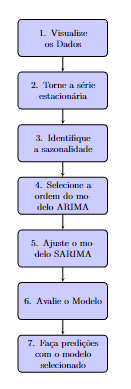


1. **Visualizar os Dados:** Comece examinando os dados da série temporal e verificando se há tendências, sazonalidade ou valores discrepantes.

2. **Tornar a série Estacionária:** Se os dados não forem estacionários, realize a diferenciação para remover tendências e sazonalidade. Isso garantirá que os dados tenham média e variância constantes.

3. **Identificar a Sazonalidade:** Determine o período sazonal da série temporal. Isso ajudará na seleção dos parâmetros do modelo SARIMA.

4. **Selecionar a Ordem do modelo ARIMA:** Use os gráficos ACF e PACF para identificar as ordens do modelo ARIMA(p, d, q). O modelo SARIMA também incluirá componentes sazonais (P, D, Q).

5. **Ajustar o Modelo SARIMA:** Ajuste o modelo SARIMA usando as ordens e parâmetros identificados.

6. **Avaliar o Modelo:** Avalie o desempenho do modelo usando medidas estatísticas como erro médio quadrático (MSE), Critério de Informação Akaike (AIC) e Critério de Informação Bayesiano (BIC).

7. **Fazer Previsões:** Use o modelo SARIMA ajustado para fazer previsões para períodos futuros.


In [1]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.1 MB/s eta 0:00:00


In [2]:
#@markdown Bibliotecas básicas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("figure", figsize=(16,8))

In [3]:
#@markdown Bibliotecas Time Series

import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
import statsmodels.api as qqplot
import scipy.stats as stats

from pmdarima import auto_arima

In [4]:
path = 'https://github.com/Rogerio-mack/Temporal/raw/main/Data/'
plt.style.use([ 'grayscale' , 'https://github.com/Rogerio-mack/Temporal/raw/main/tsp.mplstyle' ])

In [5]:
#@markdown `tspplot()`
def tspplot(ts=None,label=None,title=None,ax=None,linestyle='solid',alpha=1,lw=1,nr_xticks=None,nr_yticks=None):
  
  import matplotlib.ticker as ticker

  if ax is None:
    fig, ax = plt.subplots()
  
  if label is not None:
    ax.plot(ts, label=label, linestyle=linestyle, lw=lw)
  else:
    ax.plot(ts, linestyle=linestyle,lw=lw,alpha=alpha)

  if title is not None:
    ax.set_title(title)

  if nr_xticks is not None:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nr_xticks))

  if nr_yticks is not None:
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nr_yticks))  
  
  if label is not None:
    plt.legend()

  plt.tight_layout()

  return

In [6]:
#@markdown `tspdisplay()`
class tspdisplay(object):
    # Adaptado de https://jakevdp.github.io/PythonDataScienceHandbook/index.html
    """Display HTML representation of multiple objects"""
    template = """
    
    {0}{1}
    """
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a + '.head()')._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a + '.head()'))
                           for a in self.args)


In [7]:

#@markdown `tspsimulate()`
import ipywidgets as widgets
from statsmodels.tsa.seasonal import seasonal_decompose

def tspsimulate(nr_months=60, beta_0=1, beta_1=2, beta_2=0, beta_3=0, alpha=0.2, seasons_month_len=10, noise=0.2, model='additive', show_plot=False, title='TS Sample'):
  np.seed = 123
  index_dates = pd.date_range(start='1/1/2000', periods=nr_months, freq='M')

  t = np.arange(0,len(index_dates),1)
  n = len(t)

  T = beta_0 + beta_1*t + + beta_2*t**2 + beta_3*t**3
  S = np.sin( np.arange(0,len(index_dates),1) * 2 * np.pi/seasons_month_len)
  S = S # only positives values
  S = S * T.mean() * alpha # scale
  R = np.random.sample(n) 
  R = R # only positives values
  R = R * T.mean() * noise # scale

  if model == 'additive':
    Y = T + S + R  
  else:
    Y = T * S * R  
  
  Y = Y + np.abs(Y.min()) + 1 # just to create only positive values

  df = pd.DataFrame()
  df.index = index_dates
  df['t'], df['Y'], df['T'], df['S'], df['R'] = t, Y, T, S, R 

  global ts1
  ts1 = df

  decomp = seasonal_decompose(df.Y, model=model, period=seasons_month_len)

  if show_plot:
    fig = decomp.plot()
    fig.set_size_inches((9, 7))

    if title is not None:
      plt.suptitle(title,y=1.05)

    plt.tight_layout()
    plt.show()

  # plt.plot(df['T'])
  # plt.show()

  # plt.plot(df['S'])
  # plt.show()

  return ts1 

tspsimulate_ts = widgets.interactive(tspsimulate,  alpha=(0.2,10), beta_0=(-10,10), beta_1=(-10,10), beta_2=(-10,10), beta_3=(-10,10) ,nr_months=(40,120,1), seasons_month_len=(3, 12, 3), noise=(0, 1, 0.01), model=['additive','multiplicative'], show_plot=True)

In [8]:
#@markdown `tspdecompose()`
def tspdecompose(df,model ='multiplicative',title=None, period='7'):
  from statsmodels.tsa.seasonal import seasonal_decompose

  decomp = seasonal_decompose(df, model=model, period = period)

  fig = decomp.plot()
  fig.set_size_inches((9, 7))

  if title is not None:
    plt.suptitle(title,y=1.05)

  plt.tight_layout()
  plt.show()

  return

Para esse exemplo em particular vamos utilizar dados de observações diárias de temperatura. 

In [9]:
# ler o dado
df = pd.read_csv(path + "daily-min-temperatures.csv", sep=",")
#verifica as 5 primeiras linhas
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


Note, que o dado acima possui possui uma estrutura bastante simples, e que a coluna **Date**, contém a informação de datas, precisa se tornar o índice. Dessa forma, vamos nos preocupar primeiramente em corrigir o formato das datas para o formato datetime, assim como utilizála de índice para o nosso conjunto de dados. Essa etapa é sempre crucial em dados de séries temporais.

Neste caso em particular,a estratégia será transformar o formato da coluna **Date** para datetime aplicando o comando **to_datetime()**.  

In [10]:
# cria nova coluna com o formato ano-mês-dia a partir da informação do quarter
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').asfreq('D')
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


Ainda no contexto de explorar os dados é interessante verificar o gráfico da série histórica. No nosso caso, vamos verificar o comportamento da coluna Consumption e Income. 

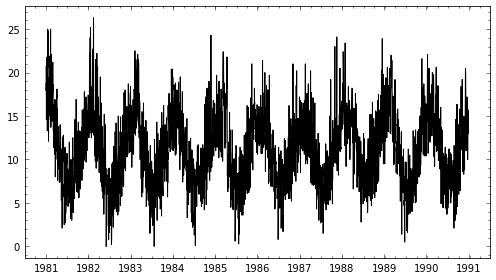

In [11]:
tspplot(df[['Temp']])
tspdisplay()

A série acima é um bom exemplo de um conjunto de dados históricos onde é difícil através apenas do gráfico identificar se existe tendência, apesar da sazonalidade evidente, assim como o período da série. Ainda assim, é importante mantermos no nosso repertório um conjunto de testes estatísticos que nos auxiliam a verificar as condições necessárias para o modelo. 

Neste tipo de caso procedemos com uma sequência de análises necessárias para a aplicação do modelo SARIMA através das seguintes etapas:

* Verificar a estacionariedade: usamos o teste de Dickey Fuller aumentado.
* Verificar sazonalidade: Usamos o plot da ACF e PACF assim como a decomposição entre tendência, erro e sazonalidade.
* Definir os parâmetros (p,d,q)(P,D,Q,m): usaremos a biblioteca pmdarima para varrer o espaço de parâmetros.
* Fazer a previsão de valores futuros: ajustamos o modelo com o melhor conjunto de parâmetros encontrados no passo anterior e na sequência fazemos a predição para o intervalo de tempo desejado.

A seguir executaremos cada uma das etapas mencionadas utilizando o código Python.

### Teste de estacionariedade
De modo a simplificar a nossa análise vamos transformar o teste aumentado de Dickey Fuller (adf_test) em uma função Python de modo a poder chamá-la diversas vezes. O código abaixo define a função desejada:

In [12]:
from statsmodels.tsa.stattools import adfuller

#Definição da função
def adf_test(timeseries):
    # Realiza o teste de Dickey-Fuller
    print('Resultados do Testes de Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

Definida a função podemos utilizá-la para testar a série visualizada no gráfico acima. 

In [21]:
adf_test(df)

Resultados do Testes de Dickey-Fuller:
Test Statistic                  -1.892313
p-value                          0.335686
#Lags Used                      13.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


Os resultados acima podem ser interpretado como estacionariedade para a série considerada, uma vez que o p-valor (**p-value**) é menor que 0,05.Dessa forma, podemos proceder para o próximo passo que é verificar a sazonalidade a partir da decomposição e dos gráficos de PACF e ACF uma vez que não foi necessário diferenciar a série. 

No entanto, a grande quantidade de dados para a série histórica representa diciculdades para o ajuste automático de modelos ARIMA. Note por exemplo, que nesse caso, teremos 365 valores para cada ano, ao longo de 10 anos. Dessa forma, o que podemos fazer é uma reamostragem da série considerando valores médios para o mês. No geral não se espera que isso afete a estrutura da série, como veremos a seguir. Para fazer a reamostragem utilizamos o comando **resample** já discutido nas seções anteriores. 

In [14]:
df = df['Temp'].resample('MS').mean()

In [15]:
df.max()

17.712903225806453

Note agora que os índices correspondem a datas de início de cada mês. Graficando a nova série temos que:  

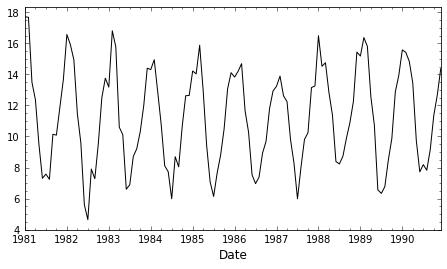

In [16]:
df.plot();

Como procedemos com uma reamostragem, obtemos uma série nova que pode inserir componentes diferentes da série anterior. Sendo assim, é prudente realizar novamente o teste de Dickey Fuller de modo a verificar a estacionariedade. Verificando novamente o teste de Dickey Fuller para estacionariedade da série reamostrada, temos que:

In [17]:
adf_test(df)

Resultados do Testes de Dickey-Fuller:
Test Statistic                  -1.892313
p-value                          0.335686
#Lags Used                      13.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


o que evidencia que a série reamostrada é não estacionária. Dessa forma podemos utilizar a estratégia de subtrair a série com o lag anterior de modo a verificar se isso satisfaz a condição de estacionariedade, nos permitindo inclusive concluir sobre o parâmetro "d" do modelo SARIMAX. Para tanto basta procedermos do seguinte modo: 

In [18]:
#o dropna() serve para eliminar o primeiro valor da série que passa a ser nulo.
df_diff = df.diff().dropna()

In [19]:
df_diff

Date
1981-02-01   -0.034332
1981-03-01   -4.178571
1981-04-01   -1.143333
1981-05-01   -2.866344
1981-06-01   -2.183656
                ...   
1990-08-01   -0.358065
1990-09-01    1.340860
1990-10-01    2.178495
1990-11-01    1.311505
1990-12-01    1.711075
Freq: MS, Name: Temp, Length: 119, dtype: float64

Realizando agora sim o teste de Dickey Fuller para a série diferenciada, percebemos que ela se torna etacionária com apenas uma única subtração.

In [20]:
adf_test(df_diff)

Resultados do Testes de Dickey-Fuller:
Test Statistic                  -4.629576
p-value                          0.000114
#Lags Used                      12.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


Observe agora que o resultado do p-valor é muito menor do que 0.05.

### Estudo da Sazonalidade
A decomposição  da série em erro,tendência e sazonalidade tem a capacidade de explicitar a ocorrência de sazonalidade. O código abaixo realiza essa decomposição através do comando **seasonal_decompose**.  

In [25]:
fig = plt.gcf()
fig.set_size_inches(16, 5)
result = seasonal_decompose(df['Temp'].dropna(), model='additive', period=7)
result.plot();
##tspdecompose(df['Temp'], model='additive') #corrigir a função
ts.display()

KeyError: ignored

<Figure size 1152x360 with 0 Axes>

In [26]:
df

Date
1981-01-01    17.712903
1981-02-01    17.678571
1981-03-01    13.500000
1981-04-01    12.356667
1981-05-01     9.490323
                ...    
1990-08-01     7.825806
1990-09-01     9.166667
1990-10-01    11.345161
1990-11-01    12.656667
1990-12-01    14.367742
Freq: MS, Name: Temp, Length: 120, dtype: float64

A partir do resultado acima, podemos verificar a existência clara de sazonalidade, através da repetição anual no terceiro gráfico (Seasonal), uma vez que temos intervalos repetidos. Como a unidade do dado da série é mensal(lembre-se que reamostramos a série) sabemos que o parâmetro de sazonalidade será m=12 para a série. Na sequência, podemos verificar também o gráfico da ACF e da PACF de modo a verificar o comportamento auto-regressivo da série. Os comando abaixo mostram os gráficos das duas funções respectivamente:

In [27]:
# ACF
from statsmodels.graphics.tsaplots import plot_acf
x=plot_acf(df['Temp'])

KeyError: ignored

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


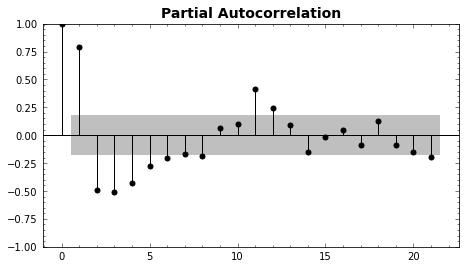

In [28]:
x=plot_pacf(df);

Observando o gráfico da PACF, é evidente que após o lag 3 não podemos afirmar que os coeficientes da autocorrelação parcial não são diferentes de zero. O que nos permite determinar a ordem da componente de autoregressiva. No entanto, vamos neste contexto, utilizar o comando **auto_arima** para varrer um determinado espaço de parâmetros. O comando **auto_arima** nos permite escolher o melhor conjunto de parâmetros a partir do AIC.

### Ajustando um modelo SARIMA automaticamente
A biblioteca **pmdarima** foi construída em Python de modo a implementar o comando **auto.arima** da linguagem **R**. Esse comando  irá nos ajudar a varrer o espaço de parâmetros e encontrar os valores (p,d,q)$\times$(P,D,Q)(m). De um modo geral, o comando tenta proceder a uma espécie de **grid search** experimentando vários valores de **p** e **q** (assim como das componentes sazonais **P** e **Q**), e definindo o melhor modelo a partir do menor valor do AIC (também é possível escolher a partir do BIC ou outro critério).

O uso do **auto-arima** é bastante simples, como pode ser visto a seguir:

In [ ]:
auto_arima(df.dropna(),
           seasonal=True,
           max_p=3,max_q=3,max_P=3,max_Q=3,d=0,D=0,m=7,
           trace=True,
           stepwise=True).summary()

Note que como parâmetros para a execução da função **auto_arima** passamos as opções seasonal=True, de modo que ele considere a possibilidade de uma série com sazonalidade e indicamos os valores máximos de p,q,P,Q, assim como os valores de **d=1** e **D=1**. O principal motivo para essa escolha é que no geral o comando parte do pressuposto que a série em questão é estacionária e no nosso caso em particular verificamos através do teste de Dickey Fuller que a série só se tornava estacionária a partir de uma diferenciação. 

O parâmetro Trace=True permite que ao longo da execução possamos visualizar o conjunto de parâmetros testados e a opção stepwise utiliza um algoritmo interno da biblioteca que otimiza as buscas de parâmetros. Você pode encontrar mais detalhes dessas opções de parâmetros para o comando auto_arima no [link](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.AutoARIMA.html#pmdarima.arima.AutoARIMA). 

A partir do momento que temos uma boa escolha para os parâmetros **(p,d,q)x(P,D,Q)(m)**, podemos recorrer novamente à biblioteca **statsmodel**, de modo a ajustar o modelo, fazer a previsão para uma parte da série e assim avaliar através de alguma métrica, como MAE, ou RMSE, a qualidade do ajuste. 

Em seguida, utilizamos a função SARIMAX da biblioteca **statsmodel** para passar os parâmetros do modelo e procedemos com o ajuste. 

In [ ]:
#import do comando SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

#declaração do modelo
model = SARIMAX(df,order=(0,1,1),seasonal_order=(0,1,1,12),enforce_invertibility=False)
#ajuste do modelo
results = model.fit()
#resultados e métricas de avaliação
results.summary()

Comentar os resultados dos testes aqui e como interpretar. Principalmente os coeficientes e talvez o teste de Ljung_Box para os resíduos????? P-value também.


Uma outra forma importante de avaliação e recomendada sempre que ajustamos um modelo ARIMA (ou SARIMAX), é através do comando **plot_diagnostics**. Esta função nos permite avaliar se as premissas do modelo não foram violadas.  

In [ ]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

As verificações importantes neste caso são as de que os resíduos parecem seguir uma distribuição normal (indicando aleatoriedade) como pode ser visto através do histograma e do gráfico Q-Q.

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('1990-01-01'), dynamic=False)

Podemos ainda, obter um dataframe com o intervalo de confiança para os valores preditos através do comando **conf_int()** a seguir:

In [ ]:
pred_ci = pred.conf_int()
pred_ci

Podemos assim visualizar a série histórica, acrescentando o valor predito para o ano de 1990. 

In [ ]:
ylabel='Monthly Avg. Temperature'
xlabel='Date'

ax = df.plot(legend=True,figsize=(12,6))
pred.predicted_mean.rename('SARIMA(0,1,1)(0,1,1,12) Predictions').plot(legend=True, )

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], alpha=.2)

ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Apesar do ajuste parecer relativamente bom a partir da visualização do gráfico, é importante estimar o erro quadrático médio (MSE), assim como a sua raiz (RMSE):

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(pred.predicted_mean,df['1990-01-01':])
RMSE = np.sqrt(MSE)
print("RMSE = {:0.2f}".format(RMSE))

Observe no entanto que o RMSE está na mesma unidade da série, ele pode ser interpretado no caso como flutuações de temperatura. No gráfico acima a escala de temperatura parece variar no intervalo de 5 a 18 unidades. A flutuação de 0.68 é em torno de 4% dessa escala onde a temperatura varia, garantindo que o RMSE seja muito menor (~4%) do que a variação do dado, o que é um excelente resultado.

### Realizando a previsão

Realizado todos os procedimentos acima, fazer a previsão de valores futuros que não estão na amostra (**forecast** em inglês), é trivial. A biblioteca statsmodel mantém a função **get_forecast** que recebe como argumento o número de pontos através do parâmetro **steps**. Nesse caso, para fazermos a previsão para os próximos 50 pontos futuros da série estudada, basta fazermos:

In [ ]:
pred_uc = results.get_forecast(steps=50)

# Intervalo de Confiança
pred_ci = pred_uc.conf_int()

In [ ]:
ax = df.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')

plt.legend()
plt.show()

## Modelos SARIMAX

Na seção anterior discutimos modelos SARIMA como uma extensão dos modelos ARIMA de modo a contabilizar o efeito da sazonalidade. No entanto, outras generalizações ainda são viáveis como a possibilidade de levar em consideração variáveis explicativas auxiliares para o modelo. Neste contexto surgem os modelos denominados SARIMAX onde o **X** se refere a modelos ARIMA sazonais com variáveis denominadas e**X**ógenas. 

Variáveis exógenas em séries temporais são variáveis externas ou explicativas que podem servir como inputs adicionais de modo a prever ou entender variações nos sistemas estudados. Exemplos de variáveis exógenas são:
* Indicadores econômicos: o produto interno bruto (PIB), taxas de desemprego, inflação etc, podem ser considerados como variáveis exógenas em séries de mofdelagem econômica.
* Variáveis climáticas: temperatura, precipitação, umidade relativa do ar podem ser variáveis exógenas em séries que se propõe a modelar por exemplo a produção de energia em um país de matriz energética como a do Brasil. 
* Variáveis de datas e feriados: feriados costumam impactar positivamente e negativamente a quantidade de vendas e participação de eventos. 

Estes são apenas alguns exemplos de variáveis que podem ser consideradas exógenas mas o seu uso requer na maioria das vezes um conhecimento significativo do negócio, de modo a estabelecer uma hipóteses sobre a influência dessa variável na série a ser modelada. 

A modelagem de modelos SARIMAX  utilizando variáveis exógenas é muito similar a modelagem de modelos SARIMA. Nas próximas seções iremos discutir essa modelagem através de exemplos práticos em Python. 

### SARIMAX com Python (hands-on)

Vamos comear agora lendo um novo conjunto de dados. Estes dados consistem em índices de consumo, renda, produção, economias e desemprego para a população americana. 

In [ ]:
df = pd.read_csv('uschange.csv',parse_dates=True)
df.head()

Observe que neste caso a coluna **Date** precisa ser transformada para o formato datetime, e também para o índice do dataframe. No entanto a tranformação em datetime neste caso se torna ligeiramente mais complexa, onde precisamos separar a informação do quarter (Q1,Q2,Q3,Q4) do ano em questão e colocar um hífen entre as duas informações para que a instrução datetime possa executar. Isso feito, podemos converter a coluna **Date** para o índice do dataframe.

In [ ]:
df['date'] = pd.to_datetime( df['Date'].str[:4] + "-"+ df['Date'].str[-2:])

In [ ]:
df = df.set_index("date")

In [ ]:
df

Observe que agora todas as colunas são indexadas e podem ser acessadas pela data de início de cada trimestre.

Para estudarmos o comportamento das variáveis exógenas podemos iniciar verificando se a variável exógena renda (Income), pode auxiliar no ajuste da variável endógena consumo (Consumption). Para facilitar vamos nos referir aos nomes originais das colunas em inglês.

O gráfico nos permite visualizar o comportamento histórico destas duas séries.

In [ ]:
df[['Consumption','Income']].plot()
plt.show()

Seguindo os mesmos procedimentos de análise da seção anterior, podemos utilizar o teste de Dickey Fuller para observar que as duas séries possuem tendência.

In [ ]:
adf_test(df['Consumption'])

In [ ]:
adf_test(df['Income'])

Observando os **p-value** para o resultado dos dois testes, podemos concluir que as duas séries são estacionárias, o que pode ser verificado também a partir da decomposição erro, tendência e sazonalidade:

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 5)
result = seasonal_decompose(df['Consumption'])
result.plot();

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 5)
result = seasonal_decompose(df['Income'])
result.plot();

Logo como podemos verificar acima as duas séries são estacionárias. 

Dado essa estacionariedade utilizaremos a função auto_arima para varrer o espaço de parâmetros e encontrar os valores (p,d,q) × (P,D,Q)(m), para a série Consumption, em princípio sem contabilizar o efeito de qualquer variável exógena. Assim, poderemos comparar a série ajustada sem e com variáveis explicativas.

In [ ]:
auto_arima(df['Consumption'],seasonal=True,m=4, trace=True).summary()

Dessa forma, obtemos que os parâmetros (1,0,3)x(0,0,0,4) constituem de acordo com o critério de Akaike (AIC) o conjunto mais apropriado para a série estudada.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['Consumption'],order=(1,0,3),seasonal_order=(0,0,0,4),enforce_invertibility=False)
results = model.fit()
results.summary()

A partir do objeto **results** criado acima, podemos predizer os valores para uma determinado intervalo de tempo e medir a qualidade do ajuste através de métricas como o MSE, RMSE ou qualquer outra mais conveniente.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df['Consumption'],order=(1,0,3),seasonal_order=(0,0,0,4),enforce_invertibility=False)
results = model.fit()
results.summary()

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2012-Q3'), dynamic=False)

In [ ]:
pred_ci = pred.conf_int()

In [ ]:
ax = df['Consumption'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Consumption')
plt.legend()

plt.show()

In [ ]:
from statsmodels.tools.eval_measures import mse,rmse
reals = df['2012-Q3':]['Consumption']
error1 = mse(pred.predicted_mean, reals)
error2 = rmse(pred.predicted_mean, reals)

print(f'SARIMA(1,0,3)(0,0,0,4) MSE Error: {error1:11.10}')
print(f'SARIMA(1,0,3)(0,0,0,4) RMSE Error: {error2:11.10}')

### Adicionando a variável exógena ao modelo SARIMA

Na seção anterior, se você observou utilizamos o comando SARIMAX para fazer o ajuste (**.fit**) do modelo, apesar de não termos especificado qual variável usaríamos. Dentro do contexto da biblioteca statsmodel, adicionar a variável exógena é bastante simples, bastando adicionar **exog=df[[variável1,variável2,...]]** como parâmetro do comando. Desta forma, vamos aproveitar o resultado da seção anterior acrescentando primeiro a coluna **Income** e depois as demais colunas em conjunto. 

In [ ]:
model = SARIMAX(df['Consumption'],exog=df[['Income']],order=(1,0,3),seasonal_order=(0,0,0,4),enforce_invertibility=False)
results = model.fit()
results.summary()

pred = results.get_prediction(start=pd.to_datetime('2012-Q3'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['Consumption'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='model', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Consumption')
plt.legend()

plt.show();

In [ ]:
from statsmodels.tools.eval_measures import mse,rmse
reals = df['2012-Q3':]['Consumption']
error1 = mse(pred.predicted_mean, reals)
error2 = rmse(pred.predicted_mean, reals)

print(f'SARIMA(1,0,3)(0,0,0,4) MSE Error: {error1:11.10}')
print(f'SARIMA(1,0,3)(0,0,0,4) RMSE Error: {error2:11.10}')

Observe que acrescentar uma única variável no sistema, não necessariamente implica em um ajuste melhor. No nosso exemplo o RMSE por exemplo varia de 0.27 para 0.40 no caso de incluirmos a variável Income. Vale destacar que nesse caso não nos preocupamos em utilizar nenhum método de seleção de variáveis, dado que estaria além do escopo a que nos propomos aqui, e apenas acrescentamos arbitrariamente os valores de uma nova coluna.

A título de curiosidade vamos acrescentar as demais colunas (Income, Production, Savings,Unemployment) e verificar através da mesma métrica, a qualidade do ajuste:

In [ ]:
model = SARIMAX(df['Consumption'],exog=df[['Income','Production','Savings','Unemployment']],order=(1,0,3),seasonal_order=(0,0,0,4),enforce_invertibility=False)
results = model.fit()
results.summary()

pred = results.get_prediction(start=pd.to_datetime('2012-Q3'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['Consumption'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='model', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Consumption')
plt.legend()

plt.show();

In [ ]:
from statsmodels.tools.eval_measures import mse,rmse
reals = df['2012-Q3':]['Consumption']
error1 = mse(pred.predicted_mean, reals)
error2 = rmse(pred.predicted_mean, reals)

print(f'SARIMA(1,0,3)(0,0,0,4) MSE Error: {error1:11.10}')
print(f'SARIMA(1,0,3)(0,0,0,4) RMSE Error: {error2:11.10}')

Observe que agora obtivemos para a mesma métrica, o RMSE, um valor ainda melhor. Esse exercício nos permite assim concluir que não existe uma receita simples e definitva para melhorar a qualidade do ajuste, como simplesmente adicionar variáveis exógenas adicionais. A utilização de modelos SARIMAX requer uma análise exploratória detalhada dos dados, assim como a experimentação de diversos valores de parâmetros de modo a escolher o valor mais apropriado para o ajuste. 

Uma outra limitação dos modelos SARIMAX pode ser melhor entendida se tentamos fazer o forecast para os próximos 15 pontos no gráfico:

In [ ]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=15)

Note que a mensagem **ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument** é de certa forma auto-explicativa. Como não temos o intervalo futuro (próximos 15 pontos) para as variáveis exógenas (Income, Production, Savings,Unemployment), nós não conseguimos fazer o forecast desejado. Caso tivéssemos precisaríamos passar este parâmetro como argumento da função **get_forecast** como no seguinte exemplo: 


```
pred_uc = results.get_forecast(steps=15, exog= df_exog)
```
onde **df_exog** precisaria ser um dataframe com 4 colunas (Income, Production, Savings,Unemployment) e 15 linhas (próximos 15 pontos do gráfico).

Um exemplo muito comum para o uso deste tipo de modelagem é por exemplo quando queremos fazer um forecast para prever vendas ao longo das próximas duas semanas. Neste caso poderíamos utilizar como variável exógena se um determinado dia da semana é feriado ou não. Nesse caso seria relativamente fácil obter o dataframe **df_exog** com uma coluna de valores 0 ou 1 no caso do dia ser feriado sim ou não respectivamente. De fato, esse é um procedimento relativamente comum e existe inclusive uma biblioteca em python que calcula os feriados denominada **holiday**. Você pode obter mais detalhes acessando [aqui](https://pypi.org/project/holidays/).


# Outros modelos com sazonalidade

Neste capítulo você pode perceber que a inclusão da sazonalidade insere uma complexidade significativa nos modelos ARIMA, através dos parâmetros $(P,D,Q)$. Neste sentido, é importante adicionar que algumas séries mais complexas possuem componentes de sazonalidade múltipla, onde podemos ter eventos que se repetem ao longo de semanas por exemplo, enquanto outros eventos podem se repetir anualmente. 

***Acrescentar aqui breve descrição sobre TBATS, Prophet, NeuralProphet entre outros***

# Para Saber Mais

Para aprofundar no tema das Séries Temporais Sazonais você pode buscar por:

* MORETTIN, Pedro A.; TOLOI, Clélia. **Análise de séries temporais.** In: Análise de séries temporais. 2006. p. 538-538.

* Souza, Reinaldo C.; Camargo, Maria Emilia. **Análise e Previsão de séries temporais.**. 2004. p. 145-158.


O texto, entretanto, não está disponível online. 
<br>

Para um tratamento mais rigoroso, mas ainda acessível e disponível online, você pode acessar: 

* HYNDMAN, Rob J.; ATHANASOPOULOS, George. **Forecasting: principles and practice.** OTexts: Melbourne, Australia. OTexts.com/fpp2. Disponível em: https://otexts.com/fpp2/

Esse texto, entretanto, emprega bibliotecas `R` no lugar do `Python`, embora o tratamento estatístico seja o mesmo. 

<br>
 